# MakeItTalk Quick Demo (natural human face animation)

- included project setup + pretrained model download
- provides step-by-step details
- todo: tdlr version

## Preparations
- Check GPU

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Wed Sep 27 15:06:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- Check ffmpeg

In [2]:
print(subprocess.getoutput('ffmpeg'))

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

- Install Github https://github.com/yzhou359/MakeItTalk

In [3]:
!git clone https://github.com/lukagouvea/MakeItTalk.git

Cloning into 'MakeItTalk'...
remote: Enumerating objects: 699, done.
remote: Counting objects: 100% (699/699), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 699 (delta 252), reused 643 (delta 227), pack-reused 0
Receiving objects: 100% (699/699), 28.42 MiB | 21.72 MiB/s, done.
Resolving deltas: 100% (252/252), done.


- Install requirements

In [4]:
%cd MakeItTalk/
!export PYTHONPATH=/content/MakeItTalk:$PYTHONPATH
!pip install -r requirements.txt
!pip install tensorboardX
!pip install puppet-warp

/content/MakeItTalk
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.7/419.7 kB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 29.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76
  Attempting uninstall: s

- Download pretrained models

In [5]:
!mkdir examples/dump
!mkdir examples/ckpt
!pip install gdown
!gdown -O examples/ckpt/ckpt_autovc.pth https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
!gdown -O examples/ckpt/ckpt_content_branch.pth https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
!gdown -O examples/ckpt/ckpt_speaker_branch.pth https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
!gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
!gdown -O examples/dump/emb.pickle https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI

Downloading...
From: https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
To: /content/MakeItTalk/examples/ckpt/ckpt_autovc.pth
100% 172M/172M [00:00<00:00, 208MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
To: /content/MakeItTalk/examples/ckpt/ckpt_content_branch.pth
100% 7.88M/7.88M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
To: /content/MakeItTalk/examples/ckpt/ckpt_speaker_branch.pth
100% 15.4M/15.4M [00:00<00:00, 178MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
To: /content/MakeItTalk/examples/ckpt/ckpt_116_i2i_comb.pth
100% 839M/839M [00:03<00:00, 259MB/s]
Downloading...
From: https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
To: /content/MakeItTalk/examples/dump/emb.pickle
100% 30.9M/30.9M [00:03<00:00, 8.22MB/s]


In [6]:
!pwd
%cd /content/MakeItTalk/
!ls
!pwd

/content/MakeItTalk
/content/MakeItTalk
CODE_OF_CONDUCT.md  main_end2end_cartoon.py	     quick_demo_tdlr.ipynb
CONTRIBUTING.md     main_end2end.py		     README.md
doc		    main_gen_new_puppet.py	     requirements.txt
examples	    main_train_content.py	     src
examples_cartoon    main_train_image_translation.py  thirdparty
facewarp	    main_train_speaker_aware.py      util
gypsum_history.sh   PULL_REQUEST_TEMPLATE.md
LICENSE.md	    quick_demo.ipynb
/content/MakeItTalk


In [40]:
import sys
sys.path.append('thirdparty/AdaptiveWingLoss')
import os, glob
import numpy as np
import argparse
import pickle
from src.autovc.AutoVC_mel_Convertor_retrain_version import AutoVC_mel_Convertor
import shutil

ADD_NAIVE_EYE = False
GEN_AUDIO = True
GEN_FLS = True

DEMO_CH = 'wilk.png'


parser = argparse.ArgumentParser()
parser.add_argument('--jpg', type=str, default='tarsila.png',help='Puppet image name to animate (with filename extension), e.g. wilk.png')
parser.add_argument('--jpg_bg', type=str, default='tarsila_bg_1.jpg', help='Puppet image background (with filename extension), e.g. wilk_bg.jpg')
parser.add_argument('--inner_lip', default=False, action='store_true', help='add this if the puppet is created with only inner lip landmarks')

parser.add_argument('--out', type=str, default='out.mp4')

parser.add_argument('--load_AUTOVC_name', type=str, default='examples/ckpt/ckpt_autovc.pth')
parser.add_argument('--load_a2l_G_name', type=str, default='examples/ckpt/ckpt_speaker_branch.pth') #ckpt_audio2landmark_g.pth') #
parser.add_argument('--load_a2l_C_name', type=str, default='examples/ckpt/ckpt_content_branch.pth') #ckpt_audio2landmark_c.pth')
parser.add_argument('--load_G_name', type=str, default='examples/ckpt/ckpt_116_i2i_comb.pth') #ckpt_i2i_finetune_150.pth') #ckpt_image2image.pth') #

parser.add_argument('--amp_lip_x', type=float, default=2.0)
parser.add_argument('--amp_lip_y', type=float, default=2.0)
parser.add_argument('--amp_pos', type=float, default=0.5)
parser.add_argument('--reuse_train_emb_list', type=str, nargs='+', default=[]) #  ['E_kmpT-EfOg']) #  ['E_kmpT-EfOg']) # ['45hn7-LXDX8'])


parser.add_argument('--add_audio_in', default=False, action='store_true')
parser.add_argument('--comb_fan_awing', default=False, action='store_true')
parser.add_argument('--output_folder', type=str, default='examples_cartoon')

#### NEW POSE MODEL
parser.add_argument('--test_end2end', default=True, action='store_true')
parser.add_argument('--dump_dir', type=str, default='', help='')
parser.add_argument('--pos_dim', default=7, type=int)
parser.add_argument('--use_prior_net', default=True, action='store_true')
parser.add_argument('--transformer_d_model', default=32, type=int)
parser.add_argument('--transformer_N', default=2, type=int)
parser.add_argument('--transformer_heads', default=2, type=int)
parser.add_argument('--spk_emb_enc_size', default=16, type=int)
parser.add_argument('--init_content_encoder', type=str, default='')
parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
parser.add_argument('--reg_lr', type=float, default=1e-6, help='weight decay')
parser.add_argument('--write', default=False, action='store_true')
parser.add_argument('--segment_batch_size', type=int, default=512, help='batch size')
parser.add_argument('--emb_coef', default=3.0, type=float)
parser.add_argument('--lambda_laplacian_smooth_loss', default=1.0, type=float)
parser.add_argument('--use_11spk_only', default=False, action='store_true')


#opt_parser = parser.parse_args()

opt_parser = parser.parse_args(args=[])

DEMO_CH = opt_parser.jpg.split('.')[0]

shape_3d = np.loadtxt('examples_cartoon/{}_face_close_mouth.txt'.format(DEMO_CH))

''' STEP 3: Generate audio data as input to audio branch '''
au_data = []
au_emb = []
ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item is not 'tmp.wav']
ains.sort()
for ain in ains:
    os.system('ffmpeg -y -loglevel error -i examples/{} -ar 16000 examples/tmp.wav'.format(ain))
    shutil.copyfile('examples/tmp.wav', 'examples/{}'.format(ain))

    # au embedding
    from thirdparty.resemblyer_util.speaker_emb import get_spk_emb
    me, ae = get_spk_emb('examples/{}'.format(ain))
    au_emb.append(me.reshape(-1))

    print('Processing audio file', ain)
    c = AutoVC_mel_Convertor('examples')
    au_data_i = c.convert_single_wav_to_autovc_input(audio_filename=os.path.join('examples', ain),
           autovc_model_path=opt_parser.load_AUTOVC_name)
    au_data += au_data_i
    # os.remove(os.path.join('examples', 'tmp.wav'))
if(os.path.isfile('examples/tmp.wav')):
    os.remove('examples/tmp.wav')

fl_data = []
rot_tran, rot_quat, anchor_t_shape = [], [], []
for au, info in au_data:
    au_length = au.shape[0]
    fl = np.zeros(shape=(au_length, 68 * 3))
    fl_data.append((fl, info))
    rot_tran.append(np.zeros(shape=(au_length, 3, 4)))
    rot_quat.append(np.zeros(shape=(au_length, 4)))
    anchor_t_shape.append(np.zeros(shape=(au_length, 68 * 3)))

if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_au.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_au.pickle'))
if (os.path.exists(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))

with open(os.path.join('examples', 'dump', 'random_val_fl.pickle'), 'wb') as fp:
    pickle.dump(fl_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_au.pickle'), 'wb') as fp:
    pickle.dump(au_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_gaze.pickle'), 'wb') as fp:
    gaze = {'rot_trans':rot_tran, 'rot_quat':rot_quat, 'anchor_t_shape':anchor_t_shape}
    pickle.dump(gaze, fp)


''' STEP 4: RUN audio->landmark network'''
from src.approaches.train_audio2landmark import Audio2landmark_model
model = Audio2landmark_model(opt_parser, jpg_shape=shape_3d)
if(len(opt_parser.reuse_train_emb_list) == 0):
    model.test(au_emb=au_emb)
else:
    model.test(au_emb=None)
print('finish gen fls')

''' STEP 5: de-normalize the output to the original image scale '''
fls_names = glob.glob1('examples_cartoon', 'pred_fls_*.txt')
fls_names.sort()


<>:70: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:70: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-40-8099041ccc4b>:70: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  ains = [item for item in ains if item is not 'tmp.wav']


Loaded the voice encoder model on cuda in 0.02 seconds.
Processing audio file tarsila.wav
0 out of 0 are in this portion
Loaded the voice encoder model on cuda in 0.02 seconds.
source shape: torch.Size([1, 320, 80]) torch.Size([1, 256]) torch.Size([1, 256]) torch.Size([1, 320, 257])
converted shape: torch.Size([1, 320, 80]) torch.Size([1, 640])
Run on device: cuda
Loading Data random_val
EVAL num videos: 1
G: Running on cuda, total num params = 3.00M
======== LOAD PRETRAINED FACE ID MODEL examples/ckpt/ckpt_speaker_branch.pth =========
======== LOAD PRETRAINED FACE ID MODEL examples/ckpt/ckpt_content_branch.pth =========
48uYS3bHIA8
YAZuSHvwVC0
0yaLdVk_UyQ
E_kmpT-EfOg
fQR31F7L3ww
JPMZAOGGHh8
W6uRNCJmdtI
2KL8PfQPmBg
p575B7k07a8
iUoAe2gXKE4
HH-iOC056aQ
S8fiWqrZEew
ROWN2ssXek8
irx71tYyI-Q
me6cdZCM2FY
OkqHtWOFliM
OfPKHc6w2vw
1lh57VnuaKE
_ldiVrXgZKc
H1Xnb_rtgqY
45hn7-LXDX8
bs7ZWVqAGCU
UElg0R7fmlk
bCs5SoifsiY
1Lx_ZqrK1bM
RrnL6Pcjjbw
sRbWv2R2hxE
wJmdE0G4sEg
hE-4e1vEiT8
XXbxe3fCQqg
02HOKnTjBlQ

#Mudei aqui para baixo para deixar os pontos nos vetores e mudei o for para rodar só para o primeiro exemplo


In [41]:
for i in range(0,1):
#for i in range(0,len(fls_names)):
    ains = glob.glob1('examples', '*.wav')
    ains.sort()
    ain = ains[i]
    fl = np.loadtxt(os.path.join('examples_cartoon', fls_names[i])).reshape((-1, 68,3))
    output_dir = os.path.join('examples_cartoon', fls_names[i][:-4])
    try:
        os.makedirs(output_dir)
    except:
        pass

    from util.utils import get_puppet_info

    bound, scale, shift = get_puppet_info(DEMO_CH, ROOT_DIR='examples_cartoon')

    fls = fl.reshape((-1, 68, 3))

    fls[:, :, 0:2] = -fls[:, :, 0:2]
    fls[:, :, 0:2] = (fls[:, :, 0:2] / scale)
    fls[:, :, 0:2] -= shift.reshape(1, 2)

    fls = fls.reshape(-1, 204)

    # additional smooth
    from scipy.signal import savgol_filter
    fls[:, 0:48*3] = savgol_filter(fls[:, 0:48*3], 17, 3, axis=0)
    fls[:, 48*3:] = savgol_filter(fls[:, 48*3:], 11, 3, axis=0)
    fls = fls.reshape((-1, 68, 3))

    # if (DEMO_CH in ['paint', 'mulaney', 'cartoonM', 'beer', 'color', 'JohnMulaney', 'vangogh', 'jm', 'roy', 'lineface']):
    if(not opt_parser.inner_lip):
        r = list(range(0, 68))
        fls = fls[:, r, :]
        fls = fls[:, :, 0:2].reshape(-1, 68 * 2)
        fls = np.concatenate((fls, np.tile(bound, (fls.shape[0], 1))), axis=1)
        fls = fls.reshape(-1, 160)

    else:
        r = list(range(0, 48)) + list(range(60, 68))
        fls = fls[:, r, :]
        fls = fls[:, :, 0:2].reshape(-1, 56 * 2)
        fls = np.concatenate((fls, np.tile(bound, (fls.shape[0], 1))), axis=1)
        fls = fls.reshape(-1, 112 + bound.shape[1])


    fls = fls.reshape(-1,int(fls.shape[1]/2),2)
    print (fls.shape)

    #print(os.path.join(output_dir, 'warped_points.txt'))
    #np.savetxt(os.path.join(output_dir, 'warped_points.txt'), fls, fmt='%.2f')

    # static_points.txt
    static_frame = np.loadtxt(os.path.join('examples_cartoon', '{}_face_open_mouth.txt'.format(DEMO_CH)))
    static_frame = static_frame[r, 0:2]
    static_frame = np.concatenate((static_frame, bound.reshape(-1, 2)), axis=0)
    print (static_frame.shape)

    # triangle_vtx_index.txt
    #shutil.copy(os.path.join('examples_cartoon', DEMO_CH + '_delauney_tri.txt'),  os.path.join(output_dir, 'triangulation.txt'))

    triangulation = np.loadtxt(os.path.join('examples_cartoon', DEMO_CH + '_delauney_tri.txt'))

    print (triangulation.shape)
    #os.remove(os.path.join('examples_cartoon', fls_names[i]))

    # ==============================================
    # Step 4 : Vector art morphing
    # ==============================================




(287, 80, 2)
(80, 2)
(146, 3)


# Os pontos para deformação estão static_frame, triangulation e fls
# A código abaixo deveria estar dentro do for acima

<ipython-input-44-320c5781c1b6>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  r = static_frame.astype(np.int)


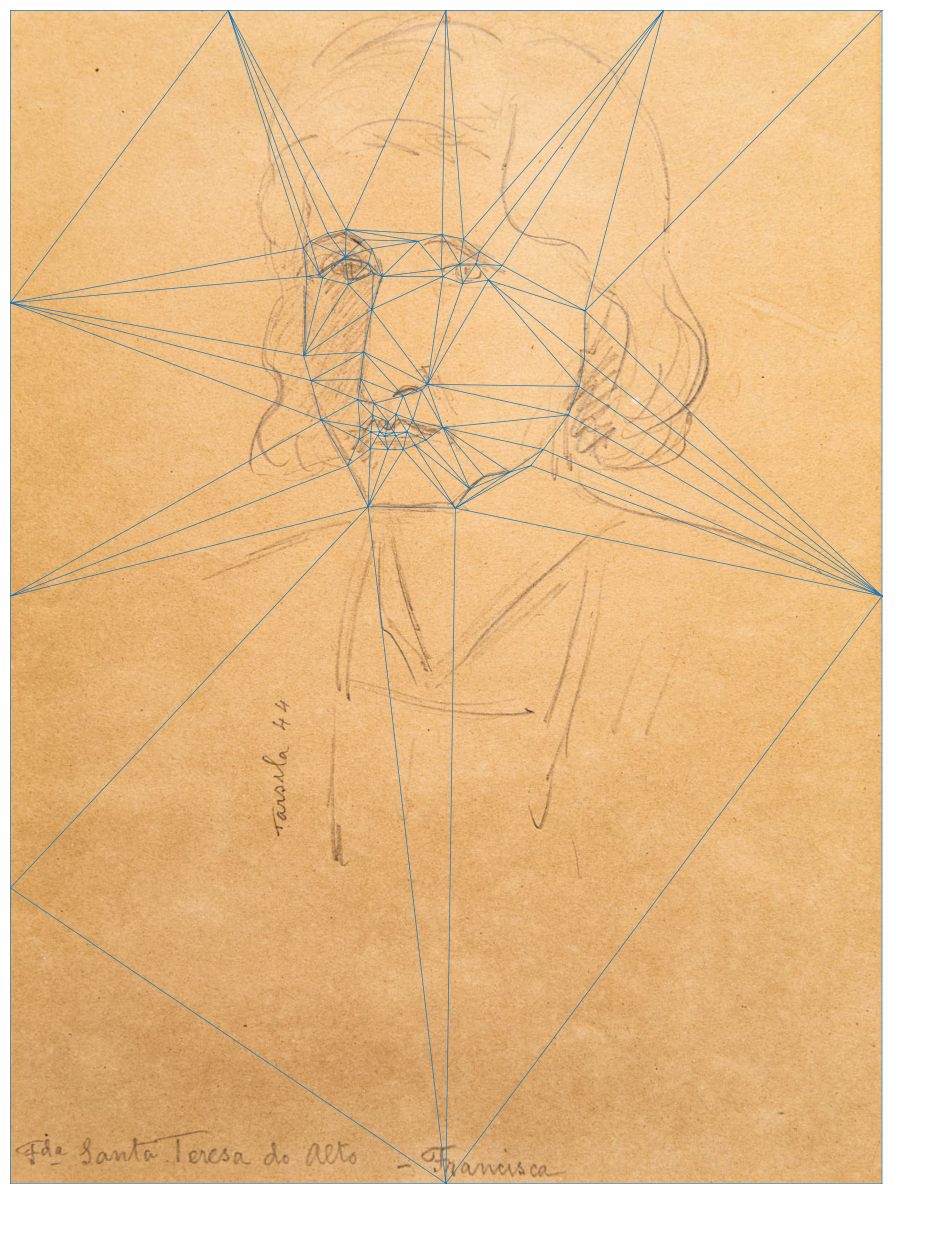

frame0


<ipython-input-44-320c5781c1b6>:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_r  = fls[i,:,:].reshape(-1,2).astype(np.int)


frame1
frame2
frame3
frame4
frame5
frame6
frame7
frame8
frame9
frame10
frame11
frame12
frame13
frame14
frame15
frame16
frame17
frame18
frame19
frame20
frame21
frame22
frame23
frame24
frame25
frame26
frame27
frame28
frame29
frame30
frame31
frame32
frame33
frame34
frame35
frame36
frame37
frame38
frame39
frame40
frame41
frame42
frame43
frame44
frame45
frame46
frame47
frame48
frame49
frame50
frame51
frame52
frame53
frame54
frame55
frame56
frame57
frame58
frame59
frame60
frame61
frame62
frame63
frame64
frame65
frame66
frame67
frame68
frame69
frame70
frame71
frame72
frame73
frame74
frame75
frame76
frame77
frame78
frame79
frame80
frame81
frame82
frame83
frame84
frame85
frame86
frame87
frame88
frame89
frame90
frame91
frame92
frame93
frame94
frame95
frame96
frame97
frame98
frame99
frame100
frame101
frame102
frame103
frame104
frame105
frame106
frame107
frame108
frame109
frame110
frame111
frame112
frame113
frame114
frame115
frame116
frame117
frame118
frame119
frame120
frame121
frame122
frame123
f

"for ax in axs:\n    ax.set_xlim([0, 1180])\n    ax.set_ylim([0, 1600])\n    ax.invert_yaxis()\n    ax.axis('off')"

In [44]:
import cv2
from matplotlib import pyplot as plt
from pwarp import graph_defined_warp, graph_warp, get_default_puppet
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.cvtColor(cv2.imread("/content/MakeItTalk/examples_cartoon/tarsila.jpg"), cv2.COLOR_BGR2RGB)
r = static_frame.astype(np.int)
for i in range(r.shape[0]):
  if r[i,0] < 0:
    r[i,0] = 0
  if r[i,0] > image.shape[1]:
    r[i,0] = image.shape[1]
  if r[i,1] < 0:
    r[i,1] = 0
  if r[i,1] > image.shape[0]:
    r[i,1] = image.shape[0]

faces = triangulation.astype(int)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('/content/video2.mp4', fourcc, 60, (image.shape[1],image.shape[0]))

#fig, axs = plt.subplots(1, 2, frameon=False)
fig, ax = plt.subplots(figsize=(image.shape[1]/ 100, image.shape[0] / 100), dpi=100)
#plt.tight_layout(pad=0)


ax.imshow(image)
ax.triplot(r.T[0], r.T[1], faces, lw=0.5)
ax.set_axis_off()

output_path = '/content/output_image.jpg'  # Replace with your desired output file path
plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()

# Processando os framos do video
for i in range(fls.shape[0]):
  print ("frame" + str(i))
  new_r  = fls[i,:,:].reshape(-1,2).astype(np.int)
  for i in range(new_r.shape[0]):
    if new_r[i,0] < 0:
      new_r[i,0] = 0
    if new_r[i,0] > image.shape[1]:
      new_r[i,0] = image.shape[1]
    if new_r[i,1] < 0:
      new_r[i,1] = 0
    if new_r[i,1] > image.shape[0]:
      new_r[i,1] = image.shape[0]
  image_t = graph_defined_warp(
    image,
    vertices_src=r,
    faces_src=faces,
    vertices_dst=new_r,
    faces_dst=faces
  )
  #cv2_imshow(cv2.cvtColor(image_t,cv2.COLOR_RGB2BGR))
  video.write(cv2.cvtColor(image_t,cv2.COLOR_RGB2BGR))

video.release()

'''fig, axs = plt.subplots(1, 2, frameon=False)
plt.tight_layout(pad=0)

axs[0].imshow(image)
axs[1].imshow(image)
axs[0].triplot(r.T[0], r.T[1], faces, lw=0.5)
axs[1].triplot(new_r.T[0], new_r.T[1], faces, lw=0.5)'''

'''for ax in axs:
    ax.set_xlim([0, 1180])
    ax.set_ylim([0, 1600])
    ax.invert_yaxis()
    ax.axis('off')'''


In [45]:
!ffmpeg -i /content/video2.mp4 -i /content/MakeItTalk/examples/tarsila.wav -c:v copy output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab